In [224]:
import os
#數據處理
import pandas as pd
import numpy as np
import random
import sklearn.preprocessing as preprocessing
#可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#機器學習
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
import scipy
warnings.filterwarnings('ignore')

In [225]:
train = pd.read_csv('/Users/bella/house_price/train.csv')
test = pd.read_csv('/Users/bella/house_price/test.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(train.dtypes)
train.describe()

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [226]:
train.drop("Id", inplace=True, axis=1)
test.drop("Id", inplace=True, axis=1)
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [227]:
count_nans = len(train) - train.count()
df_count_nans = count_nans.to_frame()
df_count_nans.columns=['train_nan_count']
df_count_nans['%_train_nans'] = (df_count_nans['train_nan_count']/train.shape[0])
#test Data
df_count_nans['test_nan_count'] = len(test) - test.count()
df_count_nans['%_test_nans'] = (df_count_nans['test_nan_count']/test.shape[0])

In [228]:
df_count_nans.sort_values('train_nan_count', ascending= False, inplace=True)
df_count_nans.query('train_nan_count > 0 or test_nan_count > 0')

,train_nan_count,%_train_nans,test_nan_count,%_test_nans
PoolQC,1453,0.995205,1456.0,0.997944
MiscFeature,1406,0.963014,1408.0,0.965045
Alley,1369,0.937671,1352.0,0.926662
Fence,1179,0.807534,1169.0,0.801234
FireplaceQu,690,0.472603,730.0,0.500343
LotFrontage,259,0.177397,227.0,0.155586
GarageYrBlt,81,0.055479,78.0,0.053461
GarageCond,81,0.055479,78.0,0.053461
GarageType,81,0.055479,76.0,0.052090
GarageFinish,81,0.055479,78.0,0.053461


In [229]:
y_train = train.SalePrice.values
train = train.drop('SalePrice',  axis=1)
print(train.shape)
print(test.shape)

(1460, 79)
(1459, 79)


In [230]:
all_data = pd.concat([train, test])
all_data.reset_index(inplace=True, drop=True)
print(all_data.shape)
all_data.columns
all_data.head()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [231]:
#all_data.drop(['PoolQC' ,'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
all_data['FireplaceQu'].fillna('None',inplace=True)
all_data['GarageCond'].fillna('None',inplace=True)
all_data['GarageType'].fillna('None',inplace=True)
all_data['GarageQual'].fillna('None',inplace=True)
all_data['GarageFinish'].fillna('None',inplace=True)
all_data['GarageYrBlt'].fillna(0, inplace=True)

all_data['BsmtExposure'].fillna('None',inplace=True)
all_data['BsmtFinType2'].fillna('None',inplace=True)
all_data['BsmtCond'].fillna('None',inplace=True)
all_data['BsmtQual'].fillna('None',inplace=True)
all_data['BsmtFinType1'].fillna('None',inplace=True)
all_data['BsmtFinSF1'].fillna(0, inplace=True)
all_data['BsmtFinSF2'].fillna(0, inplace=True)
all_data['BsmtUnfSF'].fillna(0, inplace=True)
all_data['TotalBsmtSF'].fillna(0, inplace=True)
all_data['BsmtFullBath'].fillna(0, inplace=True)
all_data['BsmtHalfBath'].fillna(0, inplace=True)

all_data['MasVnrType'].fillna('None', inplace=True)
all_data['MasVnrArea'].fillna(0, inplace=True)

all_data['Electrical'].fillna('SBrkr',inplace=True)

all_data['Functional'].fillna('Typ',inplace=True)

all_data['KitchenQual'].fillna('TA',inplace=True)

all_data['Exterior1st'].fillna('None', inplace=True)
all_data['Exterior2nd'].fillna('None', inplace=True)

all_data['MSZoning'].fillna('RL', inplace=True)

all_data['Utilities'].fillna('None', inplace=True)

all_data['SaleType'].fillna('WD', inplace=True)


In [232]:
grp = all_data.groupby('Neighborhood')['GarageCars'].mean()
nan_idx = all_data[all_data['GarageCars'].isnull() == True].index.tolist()
for idx in nan_idx:
    all_data.loc[idx, 'GarageCars'] = int(round(grp.loc[all_data.iloc[idx]['Neighborhood']]))

In [233]:
grp = all_data.groupby('Neighborhood')['GarageArea'].mean()
nan_idx = all_data[all_data['GarageArea'].isnull() == True].index.tolist()
for idx in nan_idx:
    all_data.loc[idx, 'GarageArea'] = int(round(grp.loc[all_data.iloc[idx]['Neighborhood']]))

In [234]:
all_data['LotFrontage'] = all_data.groupby('BldgType')['LotFrontage'].transform(lambda x : x.fillna(x.mean()))

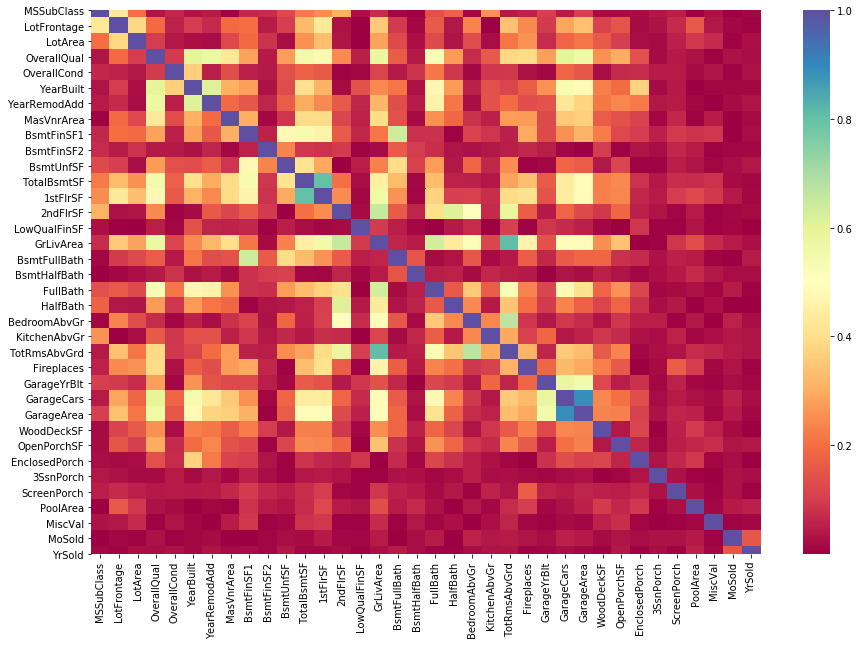

In [235]:
corr_martix = all_data.corr().abs()
plt.subplots(figsize = (15,10))
sns.heatmap(corr_martix , cmap='Spectral')

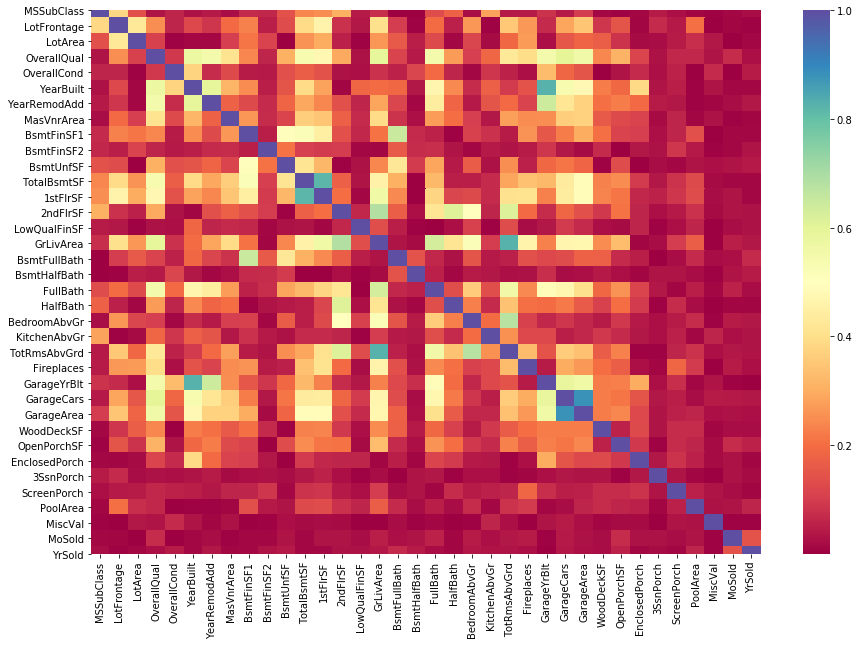

In [236]:
corr_martix = train.corr().abs()
plt.subplots(figsize = (15,10))
sns.heatmap(corr_martix , cmap='Spectral')

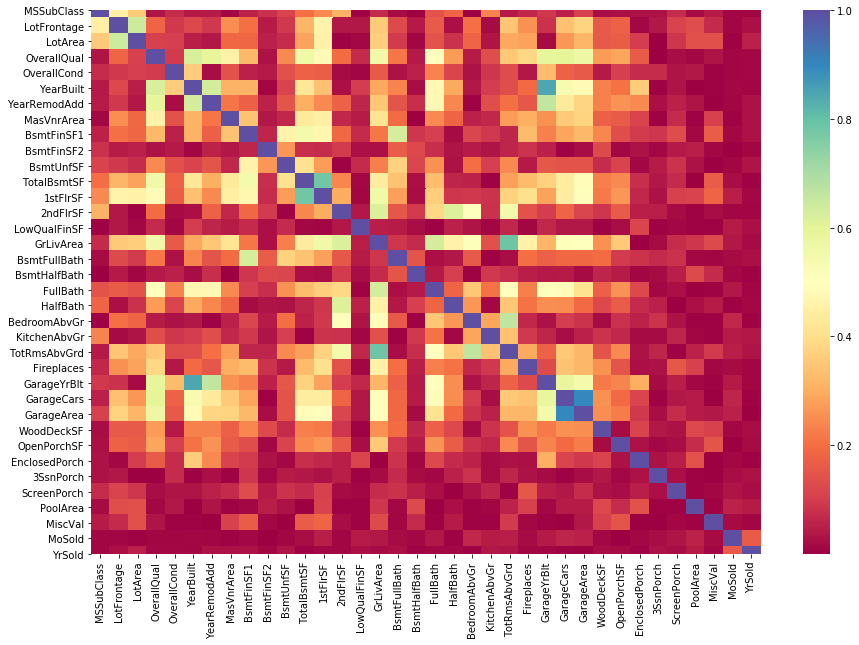

In [237]:
corr_martix = test.corr().abs()
plt.subplots(figsize = (15,10))
sns.heatmap(corr_martix , cmap='Spectral')

In [238]:
upper = corr_martix.where(np.triu(np.ones(corr_martix.shape), k=1).astype(np.bool))
to_drop = [ column for column in upper.columns if any(upper[column] >= 0.75)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


In [239]:
all_data.drop(to_drop, axis=1, inplace=True)

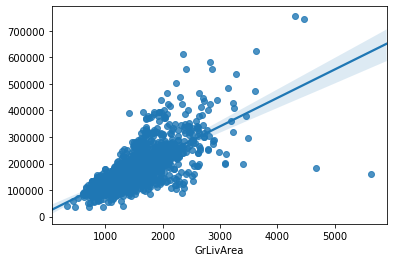

In [240]:
sns.regplot(x=train['GrLivArea'], y=y_train)

In [241]:
drop_points = train.sort_values(by = 'GrLivArea', ascending = False)[:2]['GrLivArea']
drop_points_list = drop_points.index.tolist()
all_data.drop(drop_points_list, inplace=True)

In [242]:
y_train = np.delete(y_train, drop_points_list)
train_last_index = train.shape[0] - len(drop_points_list)

In [243]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['MSSubClass'] = LabelEncoder().fit_transform(all_data['MSSubClass'])

In [244]:
skew_thresh = 0.5
skewed = all_data.skew().sort_values(ascending= False)
a= skewed[abs(skewed) > skew_thresh]

In [245]:
skewed_cols = skewed[abs(skewed) > skew_thresh].index.tolist()
print(len(skewed_cols))
print(skewed_cols)
all_data[skewed_cols] = all_data[skewed_cols].apply(np.log1p)
all_data[skewed_cols].head()

24
['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'Fireplaces', 'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt']


,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,MasVnrArea,OpenPorchSF,WoodDeckSF,LotFrontage,GrLivArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,Fireplaces,HalfBath,TotalBsmtSF,BsmtFullBath,OverallCond,YearBuilt
0,0.0,0.0,9.042040,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,5.283204,4.127134,0.000000,4.189655,7.444833,6.561031,5.017280,6.751101,0.000000,0.693147,6.753438,0.693147,1.791759,7.602900
1,0.0,0.0,9.169623,0.0,0.0,0.693147,0.0,0.000000,0.0,0.693147,0.000000,0.000000,5.700444,4.394449,7.141245,6.886532,5.652489,0.000000,0.693147,0.000000,7.141245,0.000000,2.197225,7.589336
2,0.0,0.0,9.328212,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,5.093750,3.761200,0.000000,4.234107,7.488294,6.188264,6.075346,6.765039,0.693147,0.693147,6.825460,0.693147,1.791759,7.601902
3,0.0,0.0,9.164401,0.0,0.0,0.693147,0.0,5.609472,0.0,0.000000,0.000000,3.583519,0.000000,4.110874,7.448916,5.379897,6.293419,6.629363,0.693147,0.000000,6.629363,0.693147,1.791759,7.557995
4,0.0,0.0,9.565284,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,5.860786,4.442651,5.262690,4.442651,7.695758,6.486161,6.196444,6.960348,0.693147,0.693147,7.044033,0.693147,1.791759,7.601402


In [246]:
categorical_data_cols = all_data.select_dtypes(include=['object'])
print(categorical_data_cols.columns.tolist())
print(all_data.shape)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
(2917, 75)


In [247]:
all_data = pd.get_dummies(all_data)

In [248]:
y_train = np.log1p(y_train)
all_data = (all_data - all_data.mean()) / (all_data.max() - all_data.min())
x_train = all_data.iloc[:train_last_index]
x_test = all_data.iloc[train_last_index:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(1458, 296)
(1459, 296)
(1458,)


In [251]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def _ApplyLinearAlgo(model_obj, x_train, x_test, y_train):
    model_obj.fit(x_train, y_train)
    y_predict = model_obj.predict(x_train)
    print("r2 score train : " + str(r2_score(y_train, y_predict)))
    print("rmse score train : " + str(mean_squared_error(y_train, y_predict)))
    
    print(x_train.shape)
    print(x_test.shape)
    y_te_pred = np.expm1(model_obj.predict(x_test))
    
    return y_te_pred

In [252]:
print("\n")
print("ElasticNetCV")

lr = ElasticNetCV(alphas = [0.0001, 0.0005, 0.001, 0.001, 0.01, 0.1 ,1 ,10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
y_te_Elastic = _ApplyLinearAlgo(lr, x_train, x_test, y_train)

print("\n")
print("\nRidgeCV")

lr = RidgeCV(alphas = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10])
y_te_Ridge = _ApplyLinearAlgo(lr, x_train, x_test, y_train)

print("\n")
print("RandomForestRegressor")

lr = RandomForestRegressor()
y_te_RF = _ApplyLinearAlgo(lr, x_train, x_test, y_train)



ElasticNetCV
r2 score train : 0.9365592698945274
rmse score train : 0.010128995354762861
(1458, 296)
(1459, 296)



RidgeCV
r2 score train : 0.9464508063276762
rmse score train : 0.008549705103590485
(1458, 296)
(1459, 296)


RandomForestRegressor
r2 score train : 0.9739335202803996
rmse score train : 0.004161794032885458
(1458, 296)
(1459, 296)


In [253]:
idx = pd.read_csv(r'/Users/bella/house_price/test.csv').Id
my_submi = pd.DataFrame({'Id' : idx, 'SalePrice' : y_te_Elastic})
my_submi.to_csv(r'/Users/bella/house_price/submi.csv', index=False)
my_submi.head(6)

,Id,SalePrice
0,1461,116804.428448
1,1462,155448.346534
2,1463,179344.550988
3,1464,192688.753309
4,1465,196477.379113
5,1466,171358.037872
